BirdCLEF+ 2025 Sample Submission
This is a quick run through the submission process. Test data is hidden, so we can't access it before submission. In order to make a valid submission, here's what we'll do:

Make sure we predict for all 206 classes in the train data
Load a list of test soundscapes
Process each soundscape
load audio
split into 5-second chunks
run model inference for each chunk
save predictions
Make submission csv file
Submit
Ok, so here we go



In [10]:
# !pip install kaggle

In [8]:
import os
import librosa
import numpy as np
import pandas as pd
import kagglehub

# Set seed
np.random.seed(42)

# Class labels from train audio
class_labels = sorted(os.listdir('/kaggle/input/birdclef-2025/train_audio/'))

# List of test soundscapes (only visible during submission)
test_soundscape_path = '/kaggle/input/birdclef-2025/test_soundscapes/'
test_soundscapes = [os.path.join(test_soundscape_path, afile) for afile in sorted(os.listdir(test_soundscape_path)) if afile.endswith('.ogg')]       

In [11]:
# Download latest version
path = kagglehub.model_download("google/bird-vocalization-classifier/tensorFlow2/bird-vocalization-classifier")

print("Path to model files:", path)

Path to model files: /kaggle/input/bird-vocalization-classifier/tensorflow2/bird-vocalization-classifier/8


In [26]:
len(class_labels)

206

In [29]:
taxonomy = pd.read_csv('/kaggle/input/birdclef-2025/taxonomy.csv')
taxonomy.head(9)

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta
5,134933,134933,Espadarana prosoblepon,Emerald Glass Frog,Amphibia
6,135045,135045,Andinobates opisthomelas,Andean Poison Frog,Amphibia
7,1462711,1462711,Cocconotus aratifrons,Cocconotus aratifrons,Insecta
8,1462737,1462737,Docidocercus fasciatus,Docidocercus fasciatus,Insecta


In [19]:
taxonomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   primary_label    206 non-null    object
 1   inat_taxon_id    206 non-null    int64 
 2   scientific_name  206 non-null    object
 3   common_name      206 non-null    object
 4   class_name       206 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.2+ KB


In [22]:
taxonomy.primary_label.nunique()

206

In [25]:
taxonomy.scientific_name.nunique()

206

PLAN:

Question - is there a need to sub-specify the call type i.e. distress or mating etc.

- focus on one class at a time
- Maybe use the insect and ambibians to subtract them out.
- overlay the correct birds etc with associated backgrounds to create additional training data. 
- Pre-clean with model detecting human speach or language to remove those clips
  - chunk audio and clean each chunk then can recombine if needed
  - 


In [27]:
test_soundscapes[:2]

[]

(1, 10932)
(1, 2333)
(1, 249)
(1, 41)
(1, 1280)


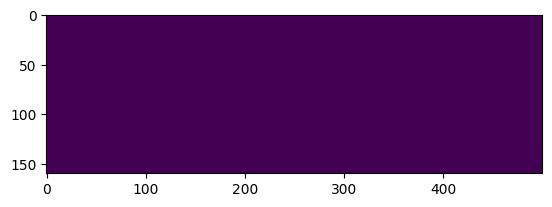

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Load the model.
model = hub.load('https://www.kaggle.com/models/google/bird-vocalization-classifier/TensorFlow2/bird-vocalization-classifier/8')

# Input: 5 seconds of silence as mono 32 kHz waveform samples.
waveform = np.zeros(5 * 32000, dtype=np.float32)

# Run the model, check the output.
model_outputs = model.infer_tf(waveform[np.newaxis, :])

# Examine the spectrogram.
plt.imshow(model_outputs['frontend'][0].T)

# Examine various logits.
print(model_outputs['label'].shape)
print(model_outputs['genus'].shape)
print(model_outputs['family'].shape)
print(model_outputs['order'].shape)

# Examine the embeddings.
print(model_outputs['embedding'].shape)


In [13]:
waveform

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [38]:
soundscape = librosa.load('/kaggle/input/birdclef-2025/train_soundscapes/H02_20230420_074000.ogg')



(22050,)

BirdCLEF+ 2025 Sample Submission
This is a quick run through the submission process. Test data is hidden, so we can't access it before submission. In order to make a valid submission, here's what we'll do:

Make sure we predict for all 206 classes in the train data
Load a list of test soundscapes
Process each soundscape
load audio
split into 5-second chunks
run model inference for each chunk
save predictions
Make submission csv file
Submit
Ok, so here we go.

In order to make a submission, we need to:

disable internet for this notebook (Settings --> Turn off internet)
make sure the notebook runs without errors and a submission file gets created
submit to competition (panel on the right)
wait for the notebook to finish (this may take a while, remember there's a 90-min time limit)
If all goes well, we should see our submission scores on the leaderboard.

In [ ]:
# Open each soundscape and make predictions for 5-second segments
# Use pandas df with 'row_id' plus class labels as columns
predictions = pd.DataFrame(columns=['row_id'] + class_labels)
for soundscape in test_soundscapes:

    # Load audio
    sig, rate = librosa.load(path=soundscape, sr=None)

    # Split into 5-second chunks
    chunks = []
    for i in range(0, len(sig), rate*5):
        chunk = sig[i:i+rate*5]
        chunks.append(chunk)
        
    # Make predictions for each chunk
    for i, chunk in enumerate(chunks):
        
        # Get row id  (soundscape id + end time of 5s chunk)      
        row_id = os.path.basename(soundscape).split('.')[0] + f'_{i * 5 + 5}'
        
        # Make prediction (let's use random scores for now)
        # scores = model.predict...
        scores = np.random.rand(len(class_labels))
        
        # Append to predictions as new row
        new_row = pd.DataFrame([[row_id] + list(scores)], columns=['row_id'] + class_labels)
        predictions = pd.concat([predictions, new_row], axis=0, ignore_index=True)

In [ ]:
# Open each soundscape and make predictions for 5-second segments
# Use pandas df with 'row_id' plus class labels as columns
predictions = pd.DataFrame(columns=['row_id'] + class_labels)
for soundscape in test_soundscapes:

    # Load audio
    sig, rate = librosa.load(path=soundscape, sr=None)

    # Split into 5-second chunks
    chunks = []
    for i in range(0, len(sig), rate*5):
        chunk = sig[i:i+rate*5]
        chunks.append(chunk)
        
    # Make predictions for each chunk
    for i, chunk in enumerate(chunks):
        
        # Get row id  (soundscape id + end time of 5s chunk)      
        row_id = os.path.basename(soundscape).split('.')[0] + f'_{i * 5 + 5}'
        
        # Make prediction (let's use random scores for now)
        # scores = model.predict...
        scores = np.random.rand(len(class_labels))
        
        # Append to predictions as new row
        new_row = pd.DataFrame([[row_id] + list(scores)], columns=['row_id'] + class_labels)
        predictions = pd.concat([predictions, new_row], axis=0, ignore_index=True)
        
# Save prediction as csv
predictions.to_csv('submission.csv', index=False)
predictions.head()
        

In [ ]:
# Save prediction as csv
predictions.to_csv('submission.csv', index=False)
predictions.head()